In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os
from tqdm.notebook import tqdm

In [2]:
def make_graph(l, inv_ks, vlen=64, lambdas=None):
    first_pots = np.asarray([
        inv_ks[0] * np.arange(vlen)**lam
        for lam in lambdas
    ])
    first_pots[first_pots>1000.0] = 1000.0
    
    pots = np.asarray([0.0, 1.0] + [10000.0]*(vlen-2))
    second_pots = np.einsum('i,j->ij', inv_ks, pots)
    
    vn = np.vstack([first_pots, second_pots])
    
    graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,vn.astype(np.float32))
    return graph, vn

In [3]:
L = 8
vlen = 128

pwr = 4.0
lambdas = np.linspace(2.0**(1.0/pwr),13.0**(1.0/pwr),64)**pwr
inv_ks = np.linspace(0.1,1.0,64)

graph,vn = make_graph(L,inv_ks,vlen=vlen,lambdas=lambdas)

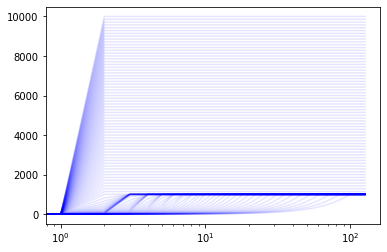

In [4]:
for pot in vn:
    plt.plot(pot, c='b', alpha=0.1)
plt.xscale('log')
plt.show()

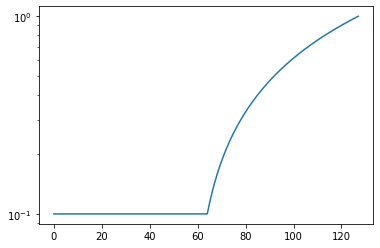

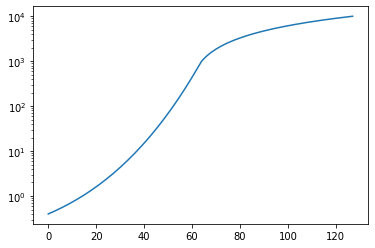

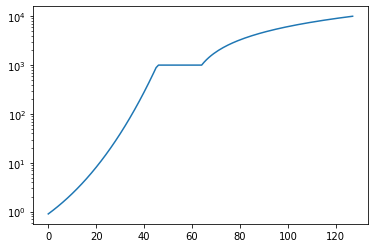

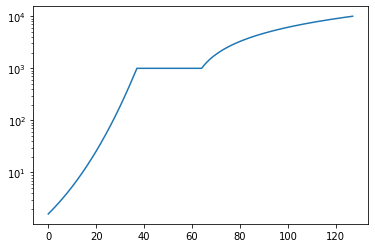

In [5]:
plt.plot(vn[:,1])
plt.yscale('log')
plt.show()

plt.plot(vn[:,2])
plt.yscale('log')
plt.show()

plt.plot(vn[:,3])
plt.yscale('log')
plt.show()

plt.plot(vn[:,4])
plt.yscale('log')
plt.show()

In [6]:
# graph.simulate(10000,run_parallel_tempering=False,run_global_updates=False)
graph.simulate(10000,run_parallel_tempering=True)

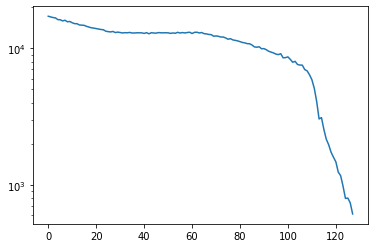

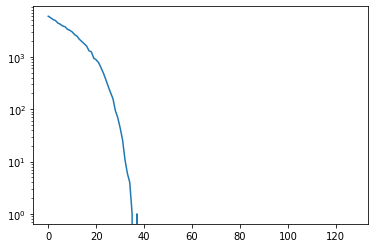

In [7]:
plt.plot((np.abs(graph.get_graph_state()) > 0).sum(axis=(-1,-2,-3,-4,-5)))
plt.yscale('log')
plt.show()

plt.plot((np.abs(graph.get_graph_state()) > 1).sum(axis=(-1,-2,-3,-4,-5)))
plt.yscale('log')
plt.show()

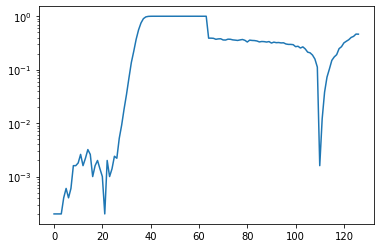

In [8]:
par_succ = graph.get_parallel_tempering_success_rate()

plt.plot(par_succ)
plt.yscale('log')
plt.show()

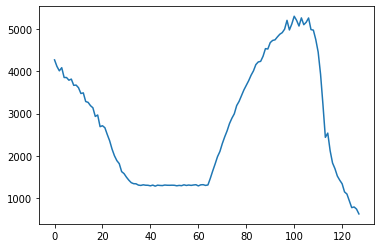

In [9]:
plt.plot(graph.get_energy())
plt.show()

In [14]:
filename = "binary_tempering_winding_Var.npz"
if not os.path.exists(filename):
    var_wns = graph.simulate_and_get_winding_variance(10000,local_updates_per_step=10,steps_per_sample=10,run_parallel_tempering=True)
    np.savez(filename, var_wns=var_wns)
else:
    war_wns = np.load(filename)['var_wns']

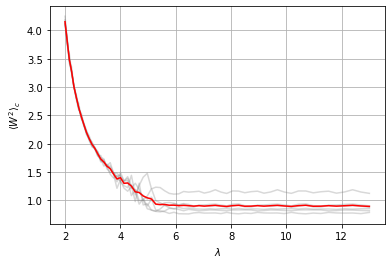

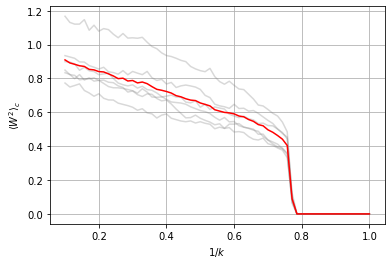

In [19]:
a_series = var_wns[:64,...]
b_series = var_wns[64:,...]

for i in range(6):
    plt.plot(lambdas, a_series[:,i], c='grey', alpha=0.3)
plt.plot(lambdas, a_series.mean(axis=-1), c='red')
plt.grid()
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\langle W^2 \rangle_c$')
plt.show()

for i in range(6):
    plt.plot(inv_ks, b_series[:,i], c='grey', alpha=0.3)
plt.plot(inv_ks, b_series.mean(axis=-1), c='red')
plt.grid()
plt.xlabel(r'$1/k$')
plt.ylabel(r'$\langle W^2 \rangle_c$')
plt.show()